In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

# Load data
df = pd.read_csv(r"C:\Users\acer\Desktop\all_squat\merged.csv", low_memory=False)
df.drop(df.columns[[0,1]], axis=1, inplace=True)
X, y = df.iloc[:, :16].values, df.iloc[:, 16:].values

# Model definition
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(20, activation='relu', kernel_initializer='he_uniform', input_shape=(n_inputs,)))
    model.add(Dense(n_outputs))
    model.compile(loss='mae', optimizer='adam')
    return model

# Evaluation
def evaluate_model(X, y):
    results = []
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    
    # K-fold CV
    cv = RepeatedKFold(n_splits=10, n_repeats=2, random_state=1)
    
    for train_ix, test_ix in cv.split(X):
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]
            
        # Preprocess
        X_scaler = MinMaxScaler().fit(X_train)
        X_train = X_scaler.transform(X_train)
        X_test = X_scaler.transform(X_test)
            
        y_scaler = MinMaxScaler().fit(y_train)
        y_train = y_scaler.transform(y_train)
        y_test = y_scaler.transform(y_test)
        
        # Fit and evaluate
        model = get_model(n_inputs, n_outputs)
        model.fit(X_train, y_train, verbose=0, epochs=100)
        mae = model.evaluate(X_test, y_test, verbose=0)
        results.append(mae)

    return np.mean(results), np.std(results)
        
mean_mae, std_mae = evaluate_model(X, y)
print('MAE: %.3f (%.3f)' % (mean_mae, std_mae))

MAE: 0.120 (0.004)


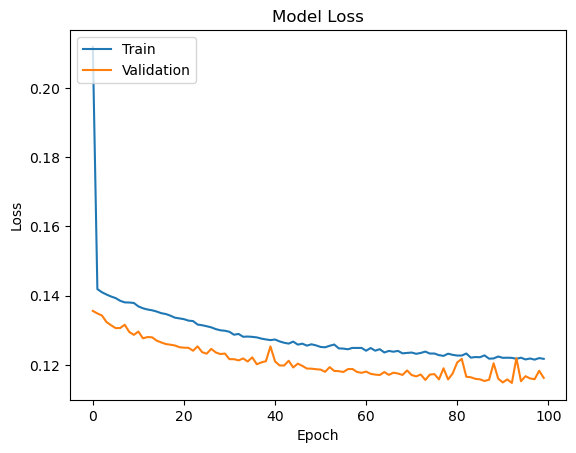

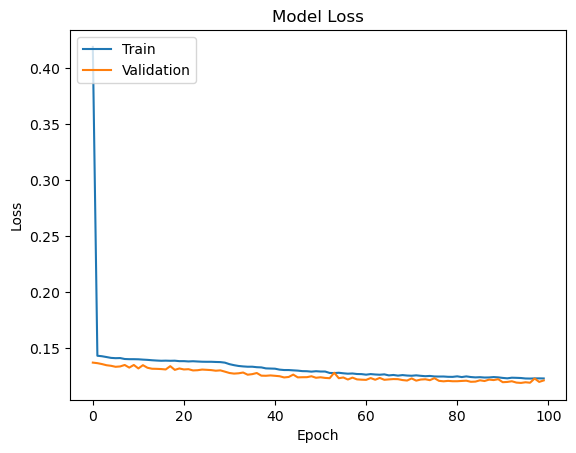

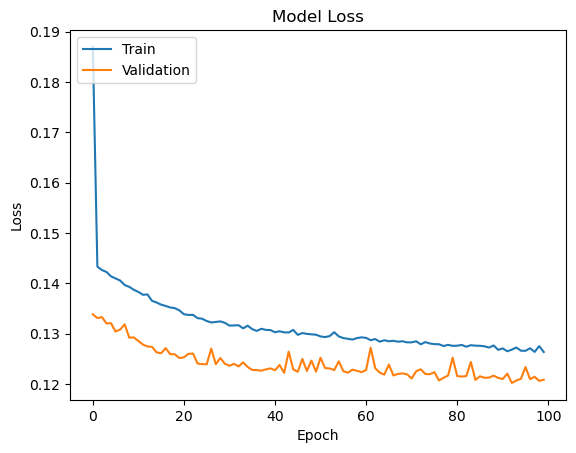

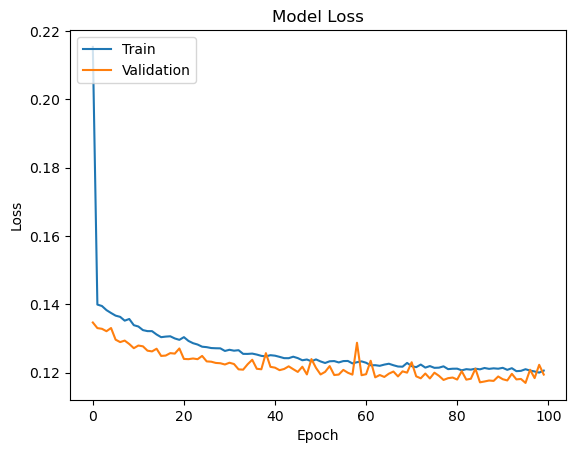

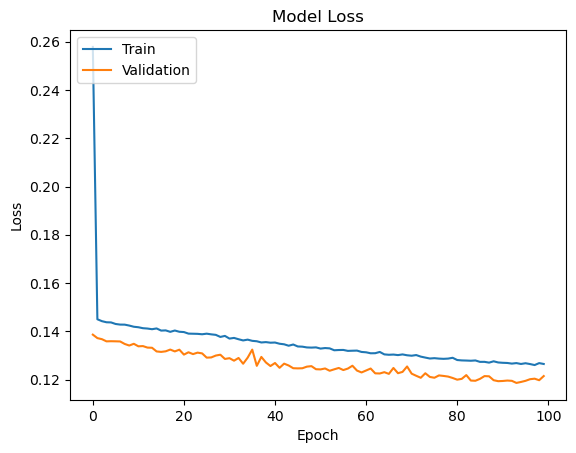

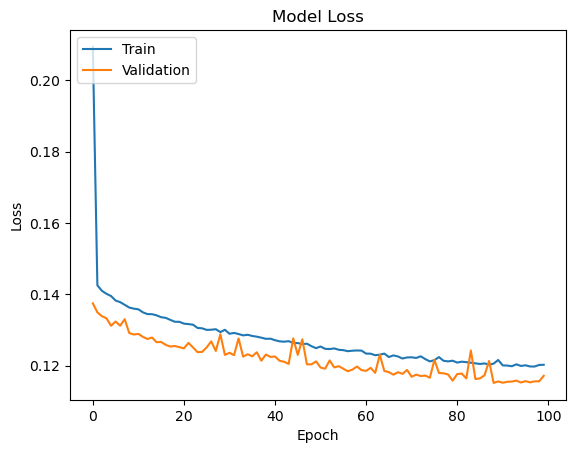

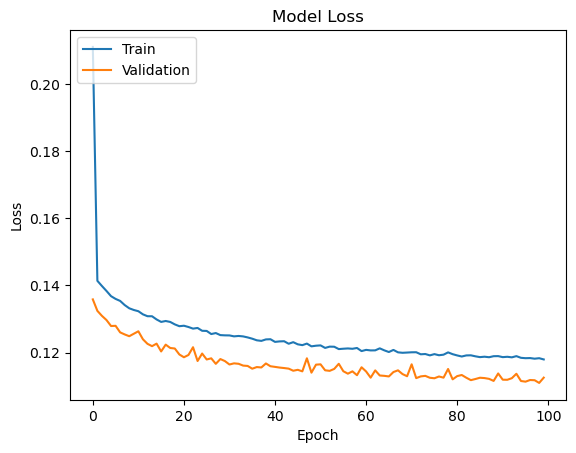

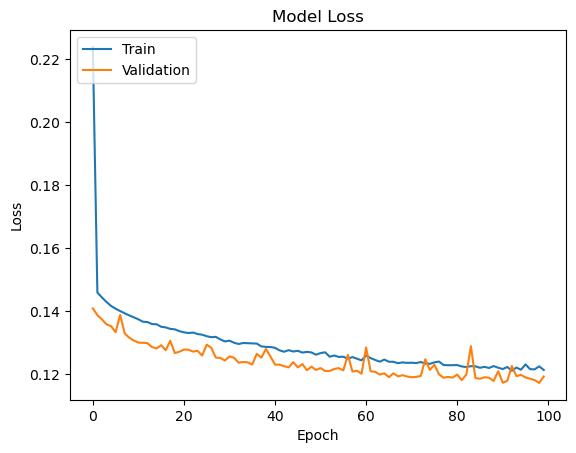

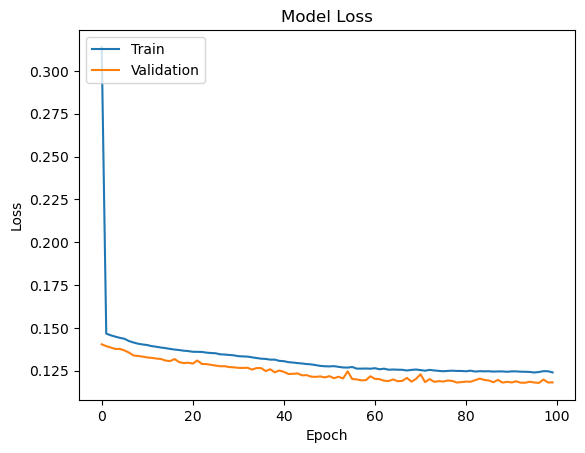

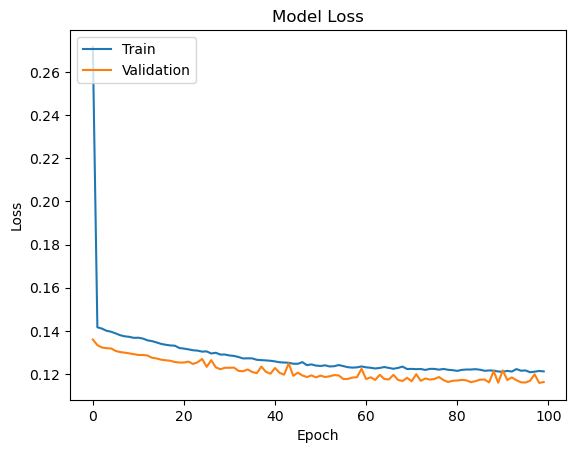

MAE: 0.123 (0.005)


In [4]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Plotting function
def plot_model(X, y):

    results = []
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    
    cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)
    
    for train_ix, test_ix in cv.split(X):
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]
            
        # Preprocess
        X_scaler = MinMaxScaler().fit(X_train)
        X_train = X_scaler.transform(X_train)
        X_test = X_scaler.transform(X_test)
            
        y_scaler = MinMaxScaler().fit(y_train)
        y_train = y_scaler.transform(y_train)
        y_test = y_scaler.transform(y_test)
            
        # Create validation set
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=7)
        
        # Fit and evaluate
        model = get_model(n_inputs, n_outputs)
        history = model.fit(X_train, y_train, epochs=100, 
                            validation_data=(X_val, y_val), verbose=0)
                            
        # Plot loss
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()
        
        mae = model.evaluate(X_test, y_test, verbose=0)
        results.append(mae)

    return np.mean(results), np.std(results)

mean_mae, std_mae = plot_model(X, y)
print('MAE: %.3f (%.3f)' % (mean_mae, std_mae))